#### We will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that we are the administrator of a university department and we want to determine each applicant's chance of admission based on their results on two exams. We have historical data from previous applicants that we can use as a training set for logistic regression. For each training example, we have the applicant's scores on two exams and the admissions decision.


In [1]:
# load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_table('ex2data1.txt', header = None, sep=',')
#data.reset_index(drop=True, inplace = True)
data.columns =['exam1', 'exam2', 'admission']
data.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualizing the Data

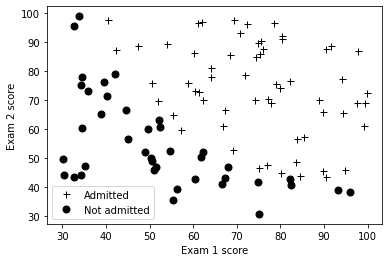

In [2]:
# finding the indices of 1 and 0 from 'admission' column

def plotdata(data):
    one_index = data.index[data['admission'] ==1].tolist()
    zero_index = data.index[data['admission'] ==0].tolist()

    plt.plot(data.iloc[one_index, 0], data.iloc[one_index, 1], 'k+', linewidth = 2, markersize = 7)
    plt.plot(data.iloc[zero_index, 0], data.iloc[zero_index, 1], 'ko', markersize = 7)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
    plt.show()

plotdata(data)

#### Here, we can find that the admitted students have the total score (the sum of exam1 score and exam2 score) more than 100. Those who are not admitted have total score lower than 100.

## Sigmoid Function

#### The logistic regression hypothesis defined as: 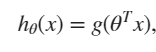
#### where function g is the sigmoid function. It is defined as: 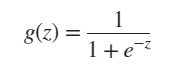

In [3]:
# the function 'sigmoid' can compute the sigmoid of each value of z (z can be a matrix vector or a scalar)

def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [4]:
test = np.zeros((2,2))
sigmoid(test)

array([[0.5, 0.5],
       [0.5, 0.5]])

## Cost Function and Gradient

#### The cost function in logistic regression is : 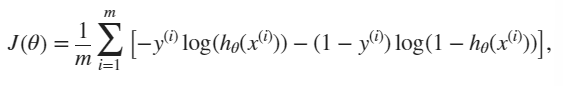
#### and the gradient of the cost is a vector of the same length as theta where the jth element (for j = 0,1,2,..,n) is defined as : 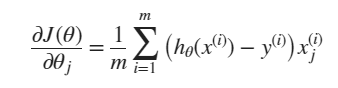

In [5]:
# getting total number of training examples
m = len(data.iloc[:, 2])

# define x and y
y = data.iloc[:, 2].to_numpy().reshape(m,1)
x = np.concatenate((np.ones((m,1)), data.iloc[:, :2]), axis = 1)
x

# initialize theta
theta_start = np.zeros((x.shape[1], 1))
theta_start2 = np.zeros(x.shape[1])

In [6]:
x.shape

(100, 3)

In [7]:
# this function will compute cost of using theta as the parameter for logistic regression 

def J(theta, x, y):
    m = len(y)
    y_prime = np.transpose(y)
    x_prime = np.transpose(x)
    h_theta = sigmoid(np.dot(x,theta))
    
    J = (-np.dot(y_prime, np.log(h_theta)) -  np.dot(np.transpose(1-y), np.log(1-h_theta)))/ m
    J = np.sum(J)
    
    #grad_of_cost = (np.dot(x_prime, (h_theta - y)))/ m
    
    return J

In [8]:
# Gradient of the cost

def Gradient(theta, x, y):
    m = len(y)
    x_prime = np.transpose(x)
    
    error = sigmoid(np.dot(x,theta)) - y
    
    #for i in range(x.shape[1]):
    #    term = np.dot(error, x[:,i])
    #    grad[i] = np.sum(term) / m 
    grad = (np.dot(x_prime, error))/ m
    grad = grad.flatten()
    return grad

In [12]:
def gradient2(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [193]:
theta_start2 = np.zeros(x.shape[1])
gradient2(theta_start2, x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [9]:
theta_start = np.zeros((x.shape[1], 1))
Gradient(theta_start, x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [189]:
initial_cost, grad = J(theta_start2, x, y), gradient2(theta_start2, x, y)

print("Cost at initial theta (zeros) : {}.".format(initial_cost))
print("Gradient at initial theta (zeros) : {}.".format(grad))

Cost at initial theta (zeros) : 0.6931471805599452.
Gradient at initial theta (zeros) : [ -0.1        -12.00921659 -11.26284221].


In [10]:
test_theta = np.array([-24, 0.2, 0.2]).reshape(3,1)
initial_cost, grad = J(test_theta, x, y), Gradient(test_theta, x, y)

print("Cost at test theta (non-zeros) : {}.".format(initial_cost))
print("Gradient at test theta (non-zeros) : {}.".format(grad))

Cost at test theta (non-zeros) : 0.2183301938265979.
Gradient at test theta (non-zeros) : [0.04290299 2.56623412 2.64679737].


## Learning Parameters using Newton-Conjugate-Gradient

#### Instead of using Gradient Descent, we will use the fmin_ncg() function (an Unconstrained minimization using the Newton-CG method) from scipy.optimize (Note: for logistic regression, there is no constraint on the theta values (theta can take any real value).
#### The required parameters for this function are:
#### 1) An objective function to be minimized. In our case, this is our cost function J(ϴ).
#### 2) Initial guess of the parameters to be optimized i.e., our initialized ϴ values.
#### 3) Gradient of J(ϴ)
#### 4) maxiter : maximum number of iterations to perform

#### The function will return the optimized ϴ values. 

In [13]:
# this is just an alternative using a different optimization method.

import scipy.optimize as opt

result = opt.fmin_tnc(func=J, x0=theta_start2, fprime = gradient2, args = (x,y))
result[0]

array([-25.16131856,   0.20623159,   0.20147149])

In [14]:
import scipy.optimize as opt

theta_start = np.zeros((x.shape[1], 1))

result = opt.fmin_ncg(J, x0=theta_start, fprime = Gradient, args = (x,y.flatten()), maxiter = 400)

print("Cost at theta found by fmin_ncg() : {}".format(J(result,x,y)))
print('Theta : {}'.format(result))

Optimization terminated successfully.
         Current function value: 0.203665
         Iterations: 26
         Function evaluations: 72
         Gradient evaluations: 168
         Hessian evaluations: 0
Cost at theta found by fmin_ncg() : 0.20366511438025717
Theta : [-24.11932876   0.1978909    0.193047  ]


## Plotting the Boundary Line

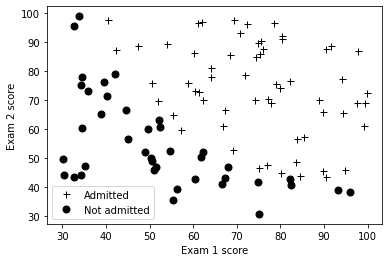

In [15]:
def plotdata(data):
    one_index = data.index[data['admission'] ==1].tolist()
    zero_index = data.index[data['admission'] ==0].tolist()

    plt.plot(data.iloc[one_index, 0], data.iloc[one_index, 1], 'k+', linewidth = 2, markersize = 7)
    plt.plot(data.iloc[zero_index, 0], data.iloc[zero_index, 1], 'ko', markersize = 7)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])
    
plotdata(data)

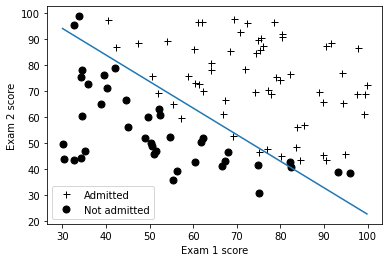

In [234]:
def plotDB(data, theta, x, y):
    plotdata(data)
    
    # we take out two values for x1
    x_values = [np.min(x[:, 1]), np.max(x[:, 1])]
    # use these x1 values to calculate x2 values
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
    
    plt.plot(x_values, y_values, label='Decision Boundary')

plotDB(data, result, x, y)
    

## Evaluating Logistic Regression

#### Now, let's predict whether a particular student will be admitted. For a student with an Exam1 score of 45 and an Exam2 score of 85, what is the admission probability?

In [16]:
X = [1, 45, 85]
theta = result
admin_probability = sigmoid(np.dot(X, theta))
admin_probability

0.7675907088980563

#### Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. 

In [17]:
# Function for predicting
# this will predict whether the label is 1 or 0 using the leraned logistic regression parameters theta

def predict(theta, x):
    m = len(x)
    p = np.zeros((m,1))
    for i in range(m):
        sig = sigmoid(np.dot(x[i],theta))
        if sig > 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

In [18]:
p = predict(result, x)
print("Train Accuracy : {}%".format(int(sum(p==y))))

Train Accuracy : 89%
